In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

pd.set_option('display.max_rows',10)

In [2]:
continuous_columns = ['price','sqft_living','sq_lot','condition','grade','sqft_above','yr_built', 'lat','long']
categorical_columns = ['bedrooms','bathrooms','floors','waterfront','sqft_basement','yr_renovated']

In [3]:
#columns to be dropped
dropped_columns = ['id','date','view','sqft_living15','sqft_lot15']

In [4]:
#df.loc[(df.lat <47.2) & (df.long > -121.8)]
# want to use longitudes less than -121.647

In [5]:
#plt.scatter(df.long,df.lat)

In [6]:
df = pd.read_csv('data/kc_house_data.csv')

# Data Cleaning

## Dropping Unwanted Columns

In [7]:
df = df.drop(columns=dropped_columns)

In [8]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

In [9]:
for col in df.columns:
    print(col,": ",df[col].isna().sum())

price :  0
bedrooms :  0
bathrooms :  0
sqft_living :  0
sqft_lot :  0
floors :  0
waterfront :  2376
condition :  0
grade :  0
sqft_above :  0
sqft_basement :  0
yr_built :  0
yr_renovated :  3842
zipcode :  0
lat :  0
long :  0


In [10]:
df.waterfront.isna()

0         True
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595     True
21596    False
Name: waterfront, Length: 21597, dtype: bool

In [11]:
df.waterfront[0]

nan

In [12]:
df.yr_renovated.isna()

0        False
1        False
2         True
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Name: yr_renovated, Length: 21597, dtype: bool

In [13]:
df.yr_renovated[2]

nan

## filling NA with 0, converting these to categorical later if needed

In [14]:
df = df.fillna(0)

In [15]:
for col in df.columns:
    print(col,": ",df[col].isna().sum())

price :  0
bedrooms :  0
bathrooms :  0
sqft_living :  0
sqft_lot :  0
floors :  0
waterfront :  0
condition :  0
grade :  0
sqft_above :  0
sqft_basement :  0
yr_built :  0
yr_renovated :  0
zipcode :  0
lat :  0
long :  0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  float64
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  object 
 11  yr_built       21597 non-null  int64  
 12  yr_renovated   21597 non-null  float64
 13  zipcode        21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
dtypes: float64(7), int64(8), object(1)
memory usage: 2.6+ MB


In [17]:
df.loc[df.sqft_basement == '?']

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
6,257500.0,3,2.25,1715,6819,2.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327
18,189000.0,2,1.00,1200,9850,1.0,0.0,4,7,1200,?,1921,0.0,98002,47.3089,-122.210
42,861990.0,5,2.75,3595,5639,2.0,0.0,3,9,3595,?,2014,0.0,98053,47.6848,-122.016
79,720000.0,4,2.50,3450,39683,2.0,0.0,3,10,3450,?,2002,0.0,98010,47.3420,-122.025
112,272500.0,3,1.75,1540,12600,1.0,0.0,4,7,1160,?,1980,0.0,98038,47.3624,-122.031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21442,504600.0,5,3.00,2360,5000,1.0,0.0,3,7,1390,?,2008,0.0,98103,47.6931,-122.330
21447,337500.0,4,2.50,2330,4907,2.0,0.0,3,7,2330,?,2013,0.0,98042,47.3590,-122.081
21473,352500.0,2,2.50,980,1010,3.0,0.0,3,8,980,?,2008,0.0,98117,47.6844,-122.387
21519,332000.0,4,2.50,2380,5737,2.0,0.0,3,7,2380,?,2010,0.0,98023,47.2815,-122.356


In [18]:
df = df.replace(to_replace="?",value=0)

In [19]:
df.sqft_basement = df.sqft_basement.astype(float)

In [20]:
df.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [21]:
#handling the 33 bedrooms

In [22]:
df = df.drop(df.loc[df.bedrooms ==33].index)

# Exploring the Data

## Visualizations

In [23]:
len(df.columns)

16

In [24]:
sns.set_style("darkgrid")

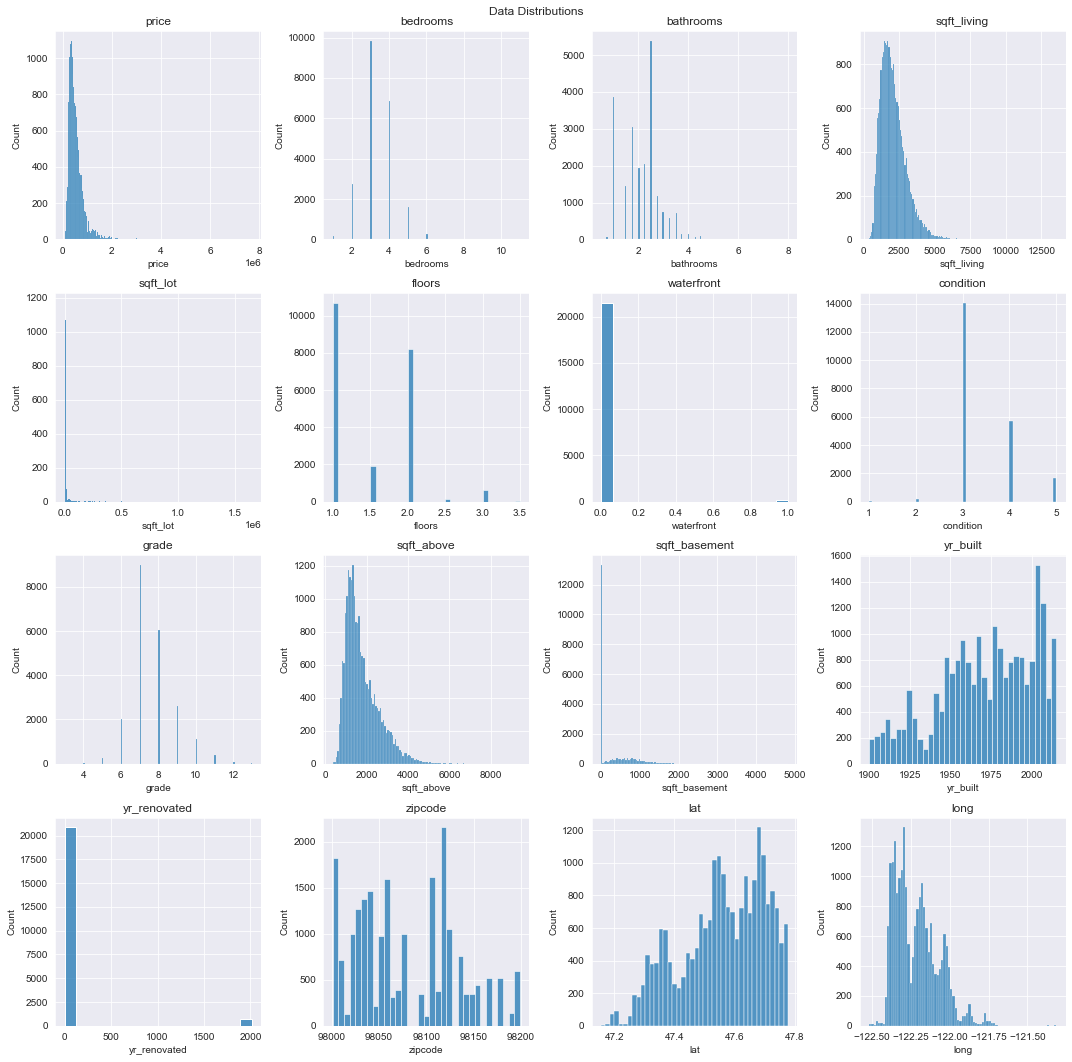

In [25]:
fig, axes = plt.subplots(figsize=(15,15),ncols=4,nrows=4)
for i in range(len(df.columns)):
    col = df.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]
    
    #ax.hist(df[col], bins=50)
    sns.histplot(df[col],ax=ax)
    ax.set_title(col)
    fig.suptitle('Data Distributions')
    fig.tight_layout()

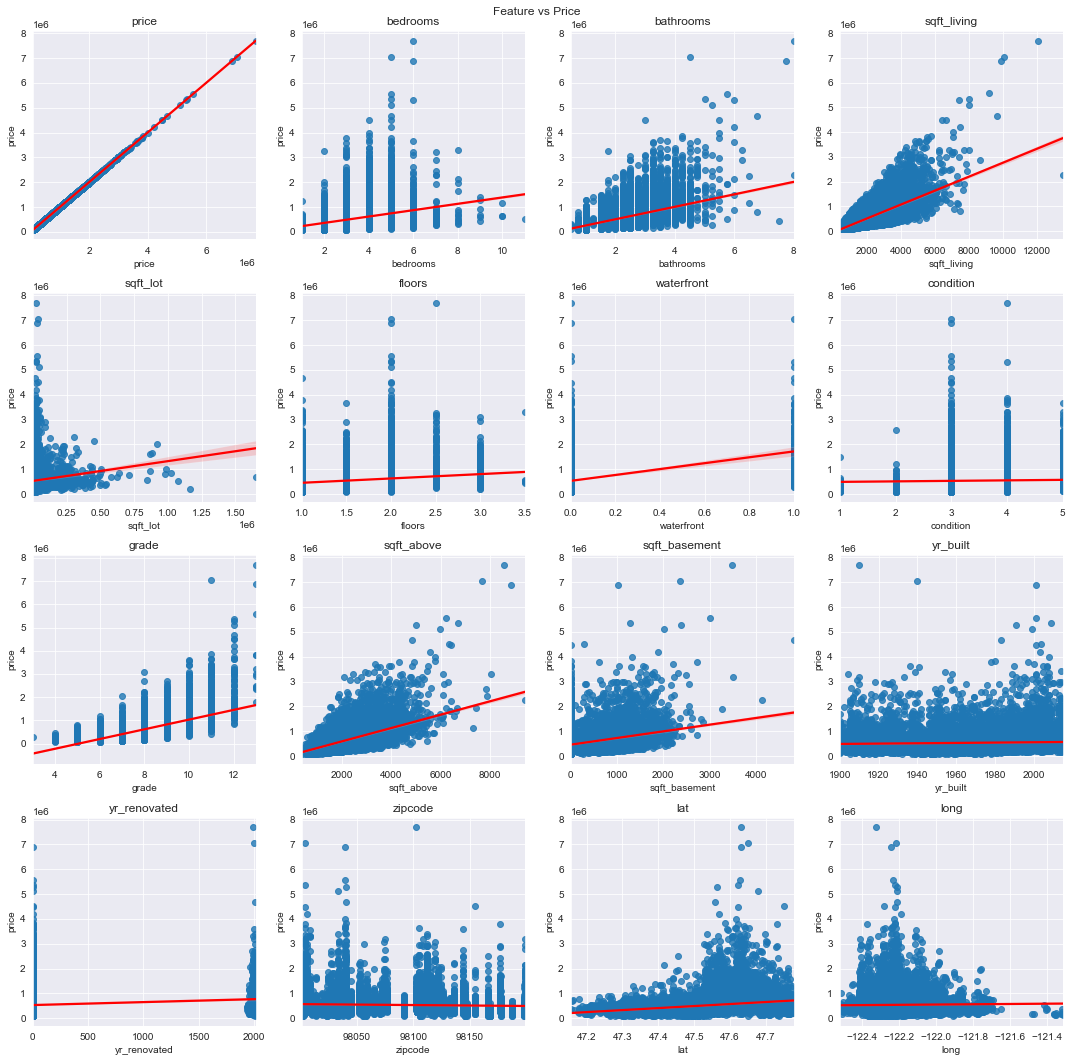

In [26]:
fig, axes = plt.subplots(figsize=(15,15),ncols=4,nrows=4)
for i in range(len(df.columns)):
    col = df.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]
    
    #ax.hist(df[col], bins=50)
    #sns.scatterplot(df[col], df['price'],ax=ax)
    sns.regplot(x=col, y='price', data=df, ax=ax, line_kws={'color':"red"})
    ax.set_title(col)
    fig.suptitle('Feature vs Price')
    fig.tight_layout()

In [27]:
df.loc[:,['sqft_living','sqft_above','sqft_basement']]

,sqft_living,sqft_above,sqft_basement
0,1180,1180,0.0
1,2570,2170,400.0
2,770,770,0.0
3,1960,1050,910.0
4,1680,1680,0.0
...,...,...,...
21592,1530,1530,0.0
21593,2310,2310,0.0
21594,1020,1020,0.0
21595,1600,1600,0.0


# Findings HERE

# Generating / Modifying Features

In [28]:
mod_df = df

## Price Per Square Foot (PSF) using sqft_above

In [29]:
mod_df['psf'] = mod_df['price'] / mod_df['sqft_above']

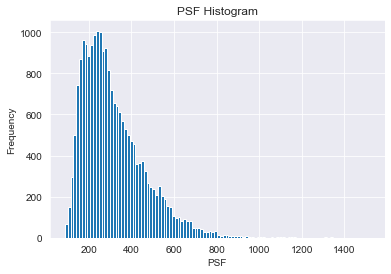

In [30]:
plt.hist(mod_df['psf'], bins='auto');
plt.title('PSF Histogram')
plt.xlabel('PSF')
plt.ylabel('Frequency');

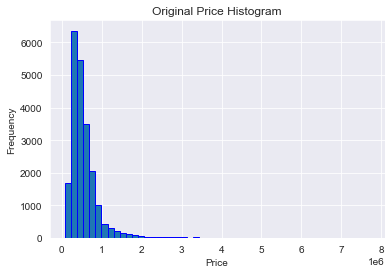

In [31]:
plt.hist(mod_df['price'], bins=50, ec = 'blue');
plt.title('Original Price Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency');

## Living to Lot Sqft Ratio

In [32]:
mod_df['livtolot'] = mod_df['sqft_living']/mod_df['sqft_lot']

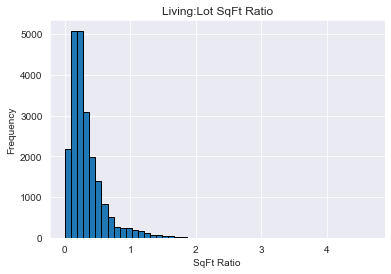

In [33]:
plt.hist(mod_df['livtolot'], bins=50, ec = 'black');
plt.title('Living:Lot SqFt Ratio')
plt.xlabel('SqFt Ratio')
plt.ylabel('Frequency');

## Basement to Categorical

In [34]:
mod_df['sqft_basement'].value_counts()

0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

In [35]:
mod_df['has_basement'] = mod_df['sqft_basement'] > 0

In [36]:
mod_df['has_basement']

0        False
1         True
2        False
3         True
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Name: has_basement, Length: 21596, dtype: bool

In [37]:
mod_df['has_basement'] = mod_df['has_basement'].astype(int)

In [38]:
mod_df['has_basement']

0        0
1        1
2        0
3        1
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: has_basement, Length: 21596, dtype: int32

## Renovation Year to Categorical

In [39]:
# Using 27 years as a cutoff between recent renovations

In [40]:
mod_df['rec_reno'] = (mod_df['yr_renovated'] > 1988).astype(int)

In [41]:
mod_df['rec_reno']

0        0
1        1
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: rec_reno, Length: 21596, dtype: int32

## Adding Geo Locations

In [42]:
# Added after initial modeling failed

In [43]:
def area_split(lat,long):
    #Outer Label
    if long > -121.647:
        return 2
    #North Label
    if lat > 47.5:
        return 0
    #South Label
    else:
        return 1

In [44]:
mod_df.apply(lambda x: area_split(x.lat,x.long), axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Length: 21596, dtype: int64

In [45]:
mod_df['location'] = mod_df.apply(lambda x: area_split(x.lat,x.long), axis=1)

In [46]:
mod_df.location.value_counts()

0    14976
1     6602
2       18
Name: location, dtype: int64

## Dropping features used in modification

In [47]:
add_drop_columns = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','lat','long','yr_renovated']

In [48]:
mod_df = mod_df.drop(add_drop_columns,axis=1)

In [49]:
mod_df.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built', 'zipcode', 'psf', 'livtolot', 'has_basement', 'rec_reno',
       'location'],
      dtype='object')

## Modified Data Visualization Checks

In [50]:
len(mod_df.columns)

13

IndexError: index 3 is out of bounds for axis 0 with size 3

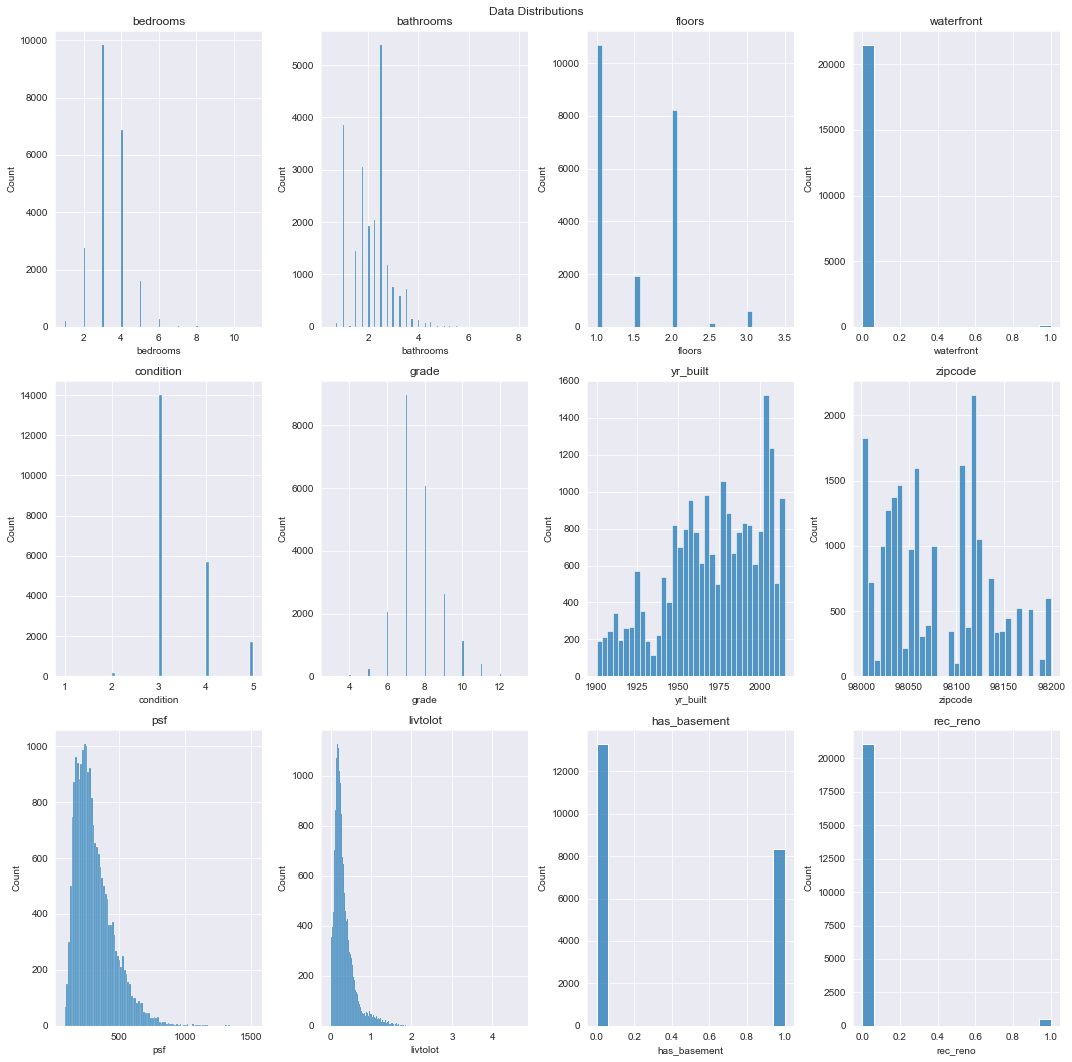

In [52]:
fig, axes = plt.subplots(figsize=(15,15),ncols=4,nrows=3)
for i in range(len(mod_df.columns)):
    col = mod_df.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]
    
    #ax.hist(df[col], bins=50)
    sns.histplot(mod_df[col],ax=ax)
    ax.set_title(col)
    fig.suptitle('Data Distributions')
    fig.tight_layout()

In [ ]:
fig, axes = plt.subplots(figsize=(15,15),ncols=4,nrows=3)
for i in range(len(mod_df.columns)):
    col = mod_df.columns[i]
    y = i%4
    x = i//4
    ax = axes[x,y]
    
    #ax.hist(df[col], bins=50)
    #sns.scatterplot(df[col], df['price'],ax=ax)
    sns.regplot(x=col, y='psf', data=mod_df, ax=ax, line_kws={'color':"red"})
    ax.set_title(col)
    fig.suptitle('Feature vs PSF')
    fig.tight_layout()

# Multicollinearity

In [ ]:
mod_df.corr() > .75

In [ ]:
pd.plotting.scatter_matrix(mod_df, figsize = [15,15]);

In [ ]:
mod_df.corr()

## Multicollinearity Findings

In [ ]:
# Need to keep an eye on the relationship between Bathrooms, Bedrooms, Floors, and Grade.
# It makes sense that the more floors a home has, the more bathrooms.
# Also, the more bedrooms, the more bathrooms are needed.

# Initial Regression Modeling

In [ ]:
mod_df.columns

In [ ]:
mod_categorical = ['waterfront','has_basement','rec_reno']

In [ ]:
y = mod_df[['psf']]
X = mod_df[['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built', 'livtolot', 'has_basement', 'rec_reno']]

In [ ]:

linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", linreg.score(X_train, y_train))
print("Test R2: ", linreg.score(X_test, y_test))

print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

In [ ]:
def model(X_train, X_test, y_train, y_test):
    
    # statsmodels
    features = X_train.copy()
    features['psf'] = y_train
    
    formula = 'psf~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    #sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    display(model.summary())
    return model

In [ ]:
model(X_train, X_test, y_train, y_test)

In [ ]:

formula = 'psf ~ bedrooms+bathrooms+floors+C(waterfront)+condition+grade+yr_built+livtolot+C(has_basement)+C(rec_reno)'
model = ols(formula=formula, data=mod_df).fit()
model.summary()

## Dropping Bathroom

In [ ]:
mod2_df = mod_df.drop('bathrooms',axis=1)

In [ ]:
formula = 'psf ~ bedrooms+floors+C(waterfront)+condition+grade+yr_built+livtolot+C(has_basement)+C(rec_reno)'
model = ols(formula=formula, data=mod2_df).fit()
model.summary()

## Findings

# Considering other features: Geography

In [ ]:
import matplotlib.image as mpimg

In [ ]:
import matplotlib.image as mpimg
fig, ax = plt.subplots(figsize=(15,15))
img = mpimg.imread('data/map.png')
imgplot = plt.imshow(img)
plt.title('Kings County Map Data');

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(df.long,df.lat);

## Geographical findings

In [ ]:
## North appears to have more expensive homes.
## There are several homes in the outskirts, such as the mountains, or separate isolated towns
## There are also two islands, Vashon and Mercer Island

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
img = mpimg.imread('data/map_areas.png')
imgplot = plt.imshow(img)
plt.title('Kings County Map Data');

In [ ]:
df.loc[(df.lat <47.2) & (df.long > -121.8)].long

In [ ]:
# Want to get longitudes greater than -121.647

In [ ]:
#keeping it simple, dividing by north, south, and outer Kings County
# North = 0
# South = 1
# Outer = 2
def area_split(lat,long):
    #Outer Label
    if long > -121.647:
        return 2
    if lat > 47.5:
        return 0
    else:
        return 1
    

In [ ]:
#test
print(area_split(df.lat[0],df.long[0]))
df.iloc[0]

In [ ]:
print(area_split(df.lat[3292],df.long[3292]))
df.iloc[3292]

In [ ]:
formula = 'psf ~ bedrooms+floors+C(waterfront)+condition+grade+yr_built+livtolot+C(has_basement)+C(rec_reno)+C(location)'
model = ols(formula=formula, data=mod_df).fit()
model.summary()

In [ ]:
df.zipcode

In [ ]:
np.sort(df.zipcode.unique())

In [ ]:
z1 = [98001,98002,98003,98023,98030,98031,98032,98055,98146,98148,98166,98168,98178,98188,98198,] #the south

In [ ]:
z2 = [98107,98117,98103,98115,98105,98133,98125,98177,98155, ] 

In [ ]:
z3 = [98102,98106,98108,98109,98112,98113,98114,98116,98118,98119,98122,98126,98144,98136,98199]

In [ ]:
z4 = [98004,98005,98006,98007,98008,98011,98027,98028,98029,98033,98034,98039, 98040,98056,98059,98052,98053,98077,98072,98074,98075,98070]

In [ ]:
z5 = [98010,98022,98092,98042,98038,98058]

In [ ]:
z6 = [98045, 98065, 98024, 98014,98019]

In [ ]:
df['zone'] = df['zipcode']

In [ ]:
def zoner(zc):
    if zc in z1:
        return 1
    if zc in z2:
        return 2
    if zc in z3:
        return 3
    if zc in z4:
        return 4
    if zc in z5:
        return 5
    if zc in z6:
        return 6

In [ ]:
df['zone'] = df['zipcode'].apply(zoner)

In [53]:
df['zone']

KeyError: 'zone'

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
sns.scatterplot(x=df.long,y=df.lat, hue=df.zone, palette='tab10')

In [54]:
df.loc[(df.long >-122.2) & (df.zone ==2)]

AttributeError: 'DataFrame' object has no attribute 'zone'

In [55]:
mod_df['zone'] = mod_df.zipcode.apply(zoner)

NameError: name 'zoner' is not defined

In [56]:
formula = 'psf ~ bedrooms+floors+C(waterfront)+condition+grade+yr_built+livtolot+C(has_basement)+C(rec_reno)+C(location)+C(zone)'
model = ols(formula=formula, data=mod_df).fit()
model.summary()

PatsyError: Error evaluating factor: NameError: name 'zone' is not defined
    psf ~ bedrooms+floors+C(waterfront)+condition+grade+yr_built+livtolot+C(has_basement)+C(rec_reno)+C(location)+C(zone)
                                                                                                                  ^^^^^^^

In [ ]:
formula = 'psf ~ bedrooms+floors+C(waterfront)+condition+grade+yr_built+livtolot+C(has_basement)+C(rec_reno)+C(location)+C(zone)'
model = ols(formula=formula, data=mod_df).fit()
model.summary()

In [57]:
formula = 'psf ~ bedrooms+floors+C(waterfront)+condition+grade+yr_built+livtolot+C(has_basement)+C(rec_reno)+C(zipcode)'
model = ols(formula=formula, data=mod_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     698.0
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:08:18   Log-Likelihood:            -1.2486e+05
No. Observations:               21596   AIC:                         2.499e+05
Df Residuals:                   21517   BIC:                         2.505e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              108.8133     61.062      1.782      0.075     -10.874     228.500
C(waterfront)[T.1.0]   330.4202      6.720     49.173      0.000     317.249     343.591
C(has_basement)[T.1]    74.0731      1.333     55.553      0.000      71.460      76.687
C(rec_reno)[T.1]        40.0663      3.558     11.260      0.000      33.092      47.041
C(zipcode)[T.98002]     -6.0359      6.964     -0.867      0.386     -19.685       7.613
C(zipcode)[T.98003]     -4.4010      6.268     -0.702      0.483     -16.687       7.885
C(zipcode)[T.98004]    376.2533      6.139     61.290      0.000     364.221     388.286
C(zipcode)[T.98005]    182.2546      7.405     24.613      0.000     167.741     196.769
C(zipcode)[T.98006]    178.1390      5.525     32.244      0.000     167.310     188.968
C(zipcode)[T.98007]    158.8295      7.835     20.272      0.000     143.472     174.187
C(zipcode)[T.98008]    169.1124      6.284     26.910      0.000     156.795     181.430
C(zipcode)[T.98010]     53.4408      8.895      6.008      0.000      36.006      70.876
C(zipcode)[T.98011]     89.5908      6.996     12.807      0.000      75.879     103.303
C(zipcode)[T.98014]     67.7389      8.202      8.259      0.000      51.663      83.815
C(zipcode)[T.98019]     66.5656      7.059      9.429      0.000      52.729      80.402
C(zipcode)[T.98022]     11.0860      6.620      1.675      0.094      -1.890      24.062
C(zipcode)[T.98023]    -15.1944      5.441     -2.793      0.005     -25.858      -4.531
C(zipcode)[T.98024]     93.7289      9.727      9.635      0.000      74.662     112.796
C(zipcode)[T.98027]    115.0289      5.711     20.142      0.000     103.835     126.223
C(zipcode)[T.98028]     89.0085      6.251     14.239      0.000      76.756     101.261
C(zipcode)[T.98029]    144.4223      6.089     23.719      0.000     132.488     156.357
C(zipcode)[T.98030]      7.9657      6.425      1.240      0.215      -4.627      20.559
C(zipcode)[T.98031]     11.4192      6.308      1.810      0.070      -0.945      23.784
C(zipcode)[T.98032]    -11.1162      8.171     -1.360      0.174     -27.131       4.899
C(zipcode)[T.98033]    217.8797      5.636     38.659      0.000     206.833     228.927
C(zipcode)[T.98034]    126.3715      5.348     23.630      0.000     115.889     136.854
C(zipcode)[T.98038]     39.8042      5.269      7.554      0.000      29.476      50.132
C(zipcode)[T.98039]    467.4394     11.953     39.105      0.000     444.010     490.869
C(zipcode)[T.98040]    276.2132      6.363     43.411      0.000     263.742     288.685
C(zipcode)[T.98042]     10.5513      5.338      1.977      0.048       0.088      21.014
C(zipcode)[T.98045]     65.1918      6.736      9.678      0.000      51.989      78.395
C(zipcode)[T.98052]    148.4319      5.308     27.966    

In [58]:
y = mod_df[['psf']]
X = mod_df[['bedrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built', 'livtolot', 'has_basement', 'rec_reno','zipcode' ]]

# 'psf ~ bedrooms+floors+C(waterfront)+condition+grade+yr_built+livtolot+C(has_basement)+C(rec_reno)+C(zipcode)'

In [59]:
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", linreg.score(X_train, y_train))
print("Test R2: ", linreg.score(X_test, y_test))

print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

Train R2:  0.4304764351590038
Test R2:  0.41655295886464316
Train RMSE:  111.51592089511094
Test RMSE:  111.60578396792671


In [60]:
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=X[['zipcode']])
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", linreg.score(X_train, y_train))
print("Test R2: ", linreg.score(X_test, y_test))

print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

Train R2:  0.4266772977686262
Test R2:  0.4321165337609578
Train RMSE:  111.81720109041953
Test RMSE:  110.37989693569452


In [61]:
#convert to dummy variables
#highp
#check assumptions

<AxesSubplot:xlabel='long', ylabel='lat'>

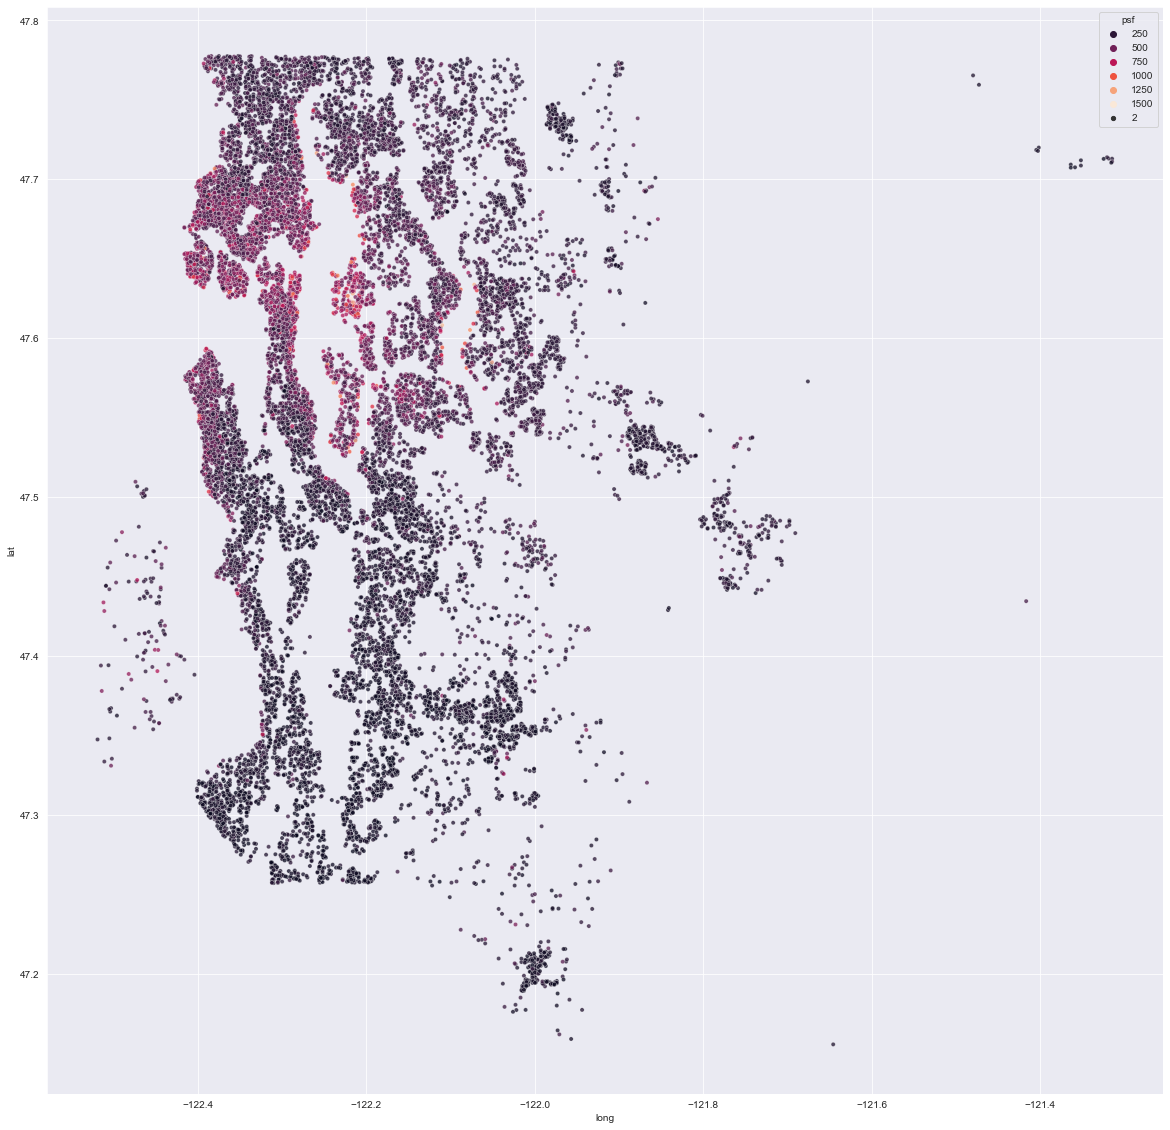

In [62]:
fig, ax = plt.subplots(figsize=(20,20))
sns.scatterplot(x=df.long,y=df.lat, hue=df.psf, palette='rocket', alpha=.75, size =2)

In [63]:
dummy_zips = pd.get_dummies(mod_df['zipcode'], prefix='zip', drop_first=True)

In [64]:
dummy_zips2 = pd.get_dummies(mod_df['zipcode'], prefix='zip')

In [65]:
dummy_zips2

,zip_98001,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21593,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21594,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
preprocessed = pd.concat([mod_df, dummy_zips], axis=1)

In [67]:
x_p = preprocessed.drop('psf', axis=1)
y_p = preprocessed['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p, y_p, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model = model(X_train, X_test, y_train, y_test)

TypeError: 'RegressionResultsWrapper' object is not callable

In [68]:
x_p = preprocessed.drop('psf', axis=1)

In [69]:
y_p = preprocessed['psf']

In [70]:
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p, y_p, test_size=0.2)
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print("Train R2: ", linreg.score(X_train, y_train))
print("Test R2: ", linreg.score(X_test, y_test))

print("Train RMSE: ", train_mse**0.5)
print("Test RMSE: ", test_mse**0.5)

Train R2:  0.7198773148039923
Test R2:  0.7089696244974848
Train RMSE:  78.41950526417024
Test RMSE:  77.9505205666449


In [71]:
prepped_model = model(X_train, X_test, y_train, y_test)

TypeError: 'RegressionResultsWrapper' object is not callable

In [72]:
#pd.plotting.scatter_matrix(preprocessed, figsize = [15,15]);

In [73]:
(preprocessed.corr() > .7)

,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,zipcode,psf,livtolot,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
bedrooms,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
floors,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zip_98177,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
zip_98178,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
zip_98188,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
zip_98198,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [74]:
prepped_model.summary().tables[1]

NameError: name 'prepped_model' is not defined

In [ ]:
prepped_model.rsquared

In [75]:
prepped_model.mse_resid

NameError: name 'prepped_model' is not defined

In [76]:
prepped_model.mse_model

NameError: name 'prepped_model' is not defined

In [77]:
prepped_model.params

NameError: name 'prepped_model' is not defined

In [78]:
prepped_model.params.sort_values()

NameError: name 'prepped_model' is not defined

In [79]:
prepped_model.params.sort_values()

NameError: name 'prepped_model' is not defined

In [80]:
fig=plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(prepped_model,'bedrooms',fig=fig)
plt.show()

NameError: name 'prepped_model' is not defined

<Figure size 1080x576 with 0 Axes>

In [81]:
fig=plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(prepped_model,'zipcode',fig=fig)
plt.show()

NameError: name 'prepped_model' is not defined

<Figure size 1080x576 with 0 Axes>

In [82]:
residuals = prepped_model.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

NameError: name 'prepped_model' is not defined

In [83]:
q1 = np.quantile(preprocessed['psf'],.25)
q3 = np.quantile(preprocessed['psf'],.75)
IQR = q3 - q1

In [84]:
preprocessed['psf'].loc[((q1-1.5*IQR)>preprocessed['psf']) | (preprocessed['psf']>(q3+1.5*IQR))]

21        858.369099
69        831.250000
100       669.944882
111       814.285714
125       732.323232
            ...     
20812     964.467005
20904     695.817490
21185     787.985866
21514     717.703349
21560    1008.474576
Name: psf, Length: 583, dtype: float64

In [85]:
preprocessed['psf'].loc[((q1-1.5*IQR)>preprocessed['psf']) | (preprocessed['psf']>(q3+1.5*IQR))].index

Int64Index([   21,    69,   100,   111,   125,   216,   246,   282,   300,
              305,
            ...
            20453, 20519, 20587, 20602, 20776, 20812, 20904, 21185, 21514,
            21560],
           dtype='int64', length=583)

In [86]:
outliers = preprocessed['psf'].loc[((q1-1.5*IQR)>preprocessed['psf']) | (preprocessed['psf']>(q3+1.5*IQR))].index

In [87]:
prepped_out = preprocessed.drop(outliers)

In [88]:
residuals = prepped_out.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

AttributeError: 'DataFrame' object has no attribute 'resid'

In [89]:
x_p2 = prepped_out.drop('psf', axis=1)
y_p2 = prepped_out['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p2, y_p2, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model2 = model(X_train, X_test, y_train, y_test)

TypeError: 'RegressionResultsWrapper' object is not callable

In [90]:
residuals = prepped_model2.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

NameError: name 'prepped_model2' is not defined

In [91]:
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p2, y_p2, test_size=0.2)
linreg.fit(X_train, y_train)

LinearRegression()

In [92]:
prepped_model2 = model(X_train, X_test, y_train, y_test)

TypeError: 'RegressionResultsWrapper' object is not callable

In [ ]:
residuals = prepped_model2.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

In [93]:
prepped_log = preprocessed

In [94]:
prepped_log['psf'] = np.log(prepped_log['psf']) 

In [95]:
x_p3 = prepped_log.drop('psf', axis=1)
y_p3 = prepped_log['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p3, y_p3, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model3 = model(X_train, X_test, y_train, y_test)

TypeError: 'RegressionResultsWrapper' object is not callable

In [96]:
residuals = prepped_model3.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

NameError: name 'prepped_model3' is not defined

In [97]:
prepped_sqrt = preprocessed

In [98]:
prepped_sqrt['psf'] = np.sqrt(prepped_sqrt['psf']) 

In [99]:
x_p4 = prepped_sqrt.drop('psf', axis=1)
y_p4 = prepped_sqrt['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p4, y_p4, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model4 = model(X_train, X_test, y_train, y_test)

TypeError: 'RegressionResultsWrapper' object is not callable

In [100]:
residuals = prepped_model4.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

NameError: name 'prepped_model4' is not defined

In [101]:
fig=plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(prepped_model4,'waterfront',fig=fig)
plt.show()

NameError: name 'prepped_model4' is not defined

<Figure size 1080x576 with 0 Axes>

In [102]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'floors', 'waterfront', 'condition', 'grade',
       'yr_built', 'zipcode', 'livtolot', 'has_basement', 'rec_reno',
       'location', 'zip_98002', 'zip_98003', 'zip_98004', 'zip_98005',
       'zip_98006', 'zip_98007', 'zip_98008', 'zip_98010', 'zip_98011',
       'zip_98014', 'zip_98019', 'zip_98022', 'zip_98023', 'zip_98024',
       'zip_98027', 'zip_98028', 'zip_98029', 'zip_98030', 'zip_98031',
       'zip_98032', 'zip_98033', 'zip_98034', 'zip_98038', 'zip_98039',
       'zip_98040', 'zip_98042', 'zip_98045', 'zip_98052', 'zip_98053',
       'zip_98055', 'zip_98056', 'zip_98058', 'zip_98059', 'zip_98065',
       'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075', 'zip_98077',
       'zip_98092', 'zip_98102', 'zip_98103', 'zip_98105', 'zip_98106',
       'zip_98107', 'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115',
       'zip_98116', 'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122',
       'zip_98125', 'zip_98126', 'zip_98133', 'zip_98136', 'z

In [103]:
def remove_outliers(df):
    q1 = np.quantile(df,.25)
    q3 = np.quantile(df,.75)
    IQR = q3 - q1
    outliers = df.loc[((q1-1.5*IQR)>df) | (df>(q3+1.5*IQR))].index
    return outliers

In [104]:
def model_outlier(X_train, X_test, y_train, y_test):
    #remove outliers first to avoid data leakage
    outliers = remove_outliers(y_train)
    X_train = X_train.drop(outliers)
    y_train = y_train.drop(outliers)
    
    
    
    # statsmodels
    features = X_train.copy()
    features['psf'] = y_train
    
    formula = 'psf~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    #sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    display(model.summary())
    
    residuals = model.resid
    fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)
    
    
    return model

In [105]:
x_p = preprocessed.drop('psf', axis=1)
y_p = preprocessed['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p, y_p, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model = model(X_train, X_test, y_train, y_test)

TypeError: 'RegressionResultsWrapper' object is not callable

In [106]:
residuals = prepped_model.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

NameError: name 'prepped_model' is not defined

In [107]:
x_p2 = prepped_out.drop('psf', axis=1)
y_p2 = prepped_out['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p2, y_p2, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model2 = model(X_train, X_test, y_train, y_test)

TypeError: 'RegressionResultsWrapper' object is not callable

In [108]:
residuals = prepped_model2.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

NameError: name 'prepped_model2' is not defined

In [109]:
x_p3 = prepped_log.drop('psf', axis=1)
y_p3 = prepped_log['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p3, y_p3, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model3 = model(X_train, X_test, y_train, y_test)

TypeError: 'RegressionResultsWrapper' object is not callable

In [110]:
residuals = prepped_model3.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

NameError: name 'prepped_model3' is not defined

In [111]:
x_p4 = prepped_sqrt.drop('psf', axis=1)
y_p4 = prepped_sqrt['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p4, y_p4, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model4 = model(X_train, X_test, y_train, y_test)

TypeError: 'RegressionResultsWrapper' object is not callable

In [ ]:
residuals = prepped_model4.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

Train R2:  0.7672299185495908
Test R2:  0.7638960100363509
Train RMSE:  0.04482629924388219
Test RMSE:  0.04477743380882519


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     707.8
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:08:30   Log-Likelihood:                 29099.
No. Observations:               17259   AIC:                        -5.804e+04
Df Residuals:                   17178   BIC:                        -5.741e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0053      0.000    -31.209      0.000      -0.006      -0.005
bedrooms        -0.0130      0.000    -27.956      0.000      -0.014      -0.012
bathrooms       -0.0035      0.001     -4.695      0.000      -0.005      -0.002
floors          -0.0251      0.001    -23.993      0.000      -0.027      -0.023
waterfront       0.1351      0.004     30.455      0.000       0.126       0.144
condition        0.0127      0.001     21.229      0.000       0.011       0.014
grade            0.0078      0.000     17.504      0.000       0.007       0.009
yr_built         0.0001   2.05e-05      5.934      0.000    8.16e-05       0.000
zipcode       2.076e-05   4.12e-07     50.425      0.000    1.99e-05    2.16e-05
livtolot        -0.0285      0.002    -13.697      0.000      -0.033      -0.024
has_basement     0.0513      0.001     58.135      0.000       0.050       0.053
rec_reno         0.0240      0.002     10.312      0.000       0.019       0.029
location        -0.0311      0.002    -14.096      0.000      -0.035      -0.027
zip_98002       -0.0045      0.004     -1.032      0.302      -0.013       0.004
zip_98003        0.0068      0.004      1.730      0.084      -0.001       0.014
zip_98004        0.2056      0.004     46.406      0.000       0.197       0.214
zip_98005        0.1256      0.005     24.624      0.000       0.116       0.136
zip_98006        0.1199      0.004     29.196      0.000       0.112       0.128
zip_98007        0.1148      0.006     20.851      0.000       0.104       0.126
zip_98008        0.1170      0.005     25.387      0.000       0.108       0.126
zip_98010        0.0517      0.006      9.118      0.000       0.041       0.063
zip_98011        0.0631      0.005     12.834      0.000       0.053       0.073
zip_98014        0.0490      0.005      8.912      0.000       0.038       0.060
zip_98019        0.0380      0.005      7.576      0.000       0.028       0.048
zip_98022        0.0192      0.004      4.459      0.000       0.011       0.028
zip_98023       -0.0042      0.003     -1.215      0.224      -0.011       0.003
zip_98024        0.0632      0.007      9.367      0.000       0.050       0.076
zip_98027        0.0913      0.004     23.007      0.000       0.083       0.099
zip_98028        0.0626      0.005     13.776      0.000       0.054       0.071
zip_98029        0.1064      0.004     23.983      0.000       0.098       0.115
zip_98030        0.0076      0.004      1.841      0.066      -0.000       0.016
zip_98031        0.0188      0.004      4.693      0.000       0.011       0.027
zip_98032        0.0022      0.005      0.419      0.676      -0.008       0.012
zip_98033        0.1389      0.004     32.952      0.000       0.131       0.147
zip_98034        0.0887      0.004     21.980      0.000       0.081       0.097
zip_9

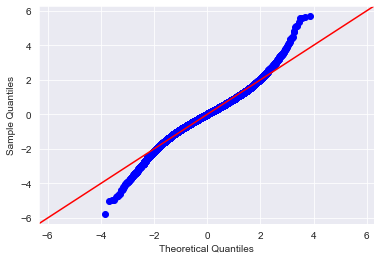

In [112]:
x_p = preprocessed.drop('psf', axis=1)
y_p = preprocessed['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p, y_p, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model = model_outlier(X_train, X_test, y_train, y_test)

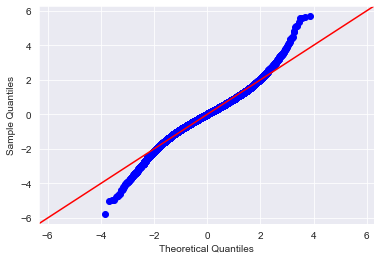

In [113]:
residuals = prepped_model.resid
fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)

<AxesSubplot:xlabel='psf'>

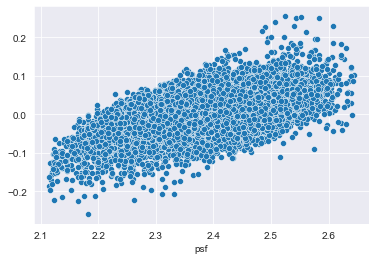

In [114]:
sns.scatterplot(y_p,prepped_model.resid)

Train R2:  0.769426440927194
Test R2:  0.7556884807944078
Train RMSE:  0.044487689459049476
Test RMSE:  0.046010214180526095


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     716.5
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:08:31   Log-Likelihood:                 29228.
No. Observations:               17258   AIC:                        -5.829e+04
Df Residuals:                   17177   BIC:                        -5.767e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0052      0.000    -30.694      0.000      -0.006      -0.005
bedrooms        -0.0137      0.000    -29.490      0.000      -0.015      -0.013
bathrooms       -0.0034      0.001     -4.502      0.000      -0.005      -0.002
floors          -0.0255      0.001    -24.676      0.000      -0.028      -0.024
waterfront       0.1311      0.004     29.672      0.000       0.122       0.140
condition        0.0129      0.001     21.569      0.000       0.012       0.014
grade            0.0079      0.000     17.875      0.000       0.007       0.009
yr_built      9.455e-05   2.03e-05      4.654      0.000    5.47e-05       0.000
zipcode       2.132e-05   4.08e-07     52.299      0.000    2.05e-05    2.21e-05
livtolot        -0.0253      0.002    -12.453      0.000      -0.029      -0.021
has_basement     0.0508      0.001     57.848      0.000       0.049       0.053
rec_reno         0.0246      0.002     10.838      0.000       0.020       0.029
location        -0.0308      0.002    -13.966      0.000      -0.035      -0.026
zip_98002       -0.0056      0.005     -1.231      0.218      -0.014       0.003
zip_98003        0.0071      0.004      1.816      0.069      -0.001       0.015
zip_98004        0.2058      0.004     46.665      0.000       0.197       0.214
zip_98005        0.1240      0.005     24.139      0.000       0.114       0.134
zip_98006        0.1190      0.004     28.911      0.000       0.111       0.127
zip_98007        0.1133      0.005     21.321      0.000       0.103       0.124
zip_98008        0.1143      0.005     25.271      0.000       0.105       0.123
zip_98010        0.0511      0.006      9.170      0.000       0.040       0.062
zip_98011        0.0621      0.005     12.668      0.000       0.053       0.072
zip_98014        0.0493      0.005      9.018      0.000       0.039       0.060
zip_98019        0.0375      0.005      7.552      0.000       0.028       0.047
zip_98022        0.0175      0.004      4.159      0.000       0.009       0.026
zip_98023       -0.0060      0.003     -1.724      0.085      -0.013       0.001
zip_98024        0.0625      0.007      9.543      0.000       0.050       0.075
zip_98027        0.0913      0.004     23.172      0.000       0.084       0.099
zip_98028        0.0597      0.004     13.289      0.000       0.051       0.069
zip_98029        0.1059      0.004     23.972      0.000       0.097       0.115
zip_98030        0.0066      0.004      1.596      0.111      -0.002       0.015
zip_98031        0.0177      0.004      4.444      0.000       0.010       0.026
zip_98032        0.0053      0.005      1.042      0.297      -0.005       0.015
zip_98033        0.1375      0.004     32.774      0.000       0.129       0.146
zip_98034        0.0870      0.004     21.480      0.000       0.079       0.095
zip_9

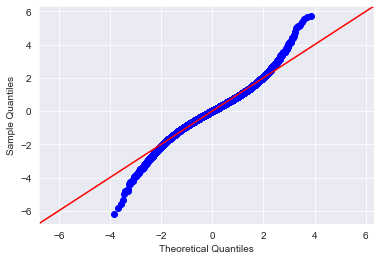

In [115]:
x_p = preprocessed.drop('psf', axis=1)
y_p = preprocessed['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p, y_p, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model = model_outlier(X_train, X_test, y_train, y_test)

<AxesSubplot:xlabel='psf'>

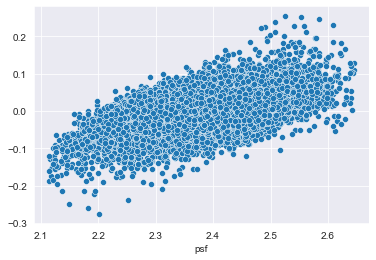

In [116]:
sns.scatterplot(y_p,prepped_model.resid)

Train R2:  0.7318482769320336
Test R2:  0.7116705820851219
Train RMSE:  63.47173562904914
Test RMSE:  66.95242921063799


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     567.1
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:08:32   Log-Likelihood:                -93039.
No. Observations:               16705   AIC:                         1.862e+05
Df Residuals:                   16624   BIC:                         1.869e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -6.5583      0.243    -26.966      0.000      -7.035      -6.082
bedrooms       -17.0503      0.675    -25.248      0.000     -18.374     -15.727
bathrooms       -3.2773      1.112     -2.948      0.003      -5.456      -1.098
floors         -33.3375      1.520    -21.925      0.000     -36.318     -30.357
waterfront     193.5600      8.586     22.543      0.000     176.730     210.390
condition       16.6257      0.870     19.106      0.000      14.920      18.331
grade            9.1031      0.658     13.829      0.000       7.813      10.393
yr_built         0.0840      0.030      2.802      0.005       0.025       0.143
zipcode          0.0002      0.001      0.398      0.691      -0.001       0.001
livtolot       -36.4153      3.004    -12.121      0.000     -42.304     -30.527
has_basement    66.9464      1.276     52.483      0.000      64.446      69.447
rec_reno        31.0024      3.425      9.053      0.000      24.290      37.715
location       -33.3355      3.154    -10.570      0.000     -39.517     -27.154
zip_98002       -4.9676      6.245     -0.795      0.426     -17.209       7.274
zip_98003        1.5910      5.571      0.286      0.775      -9.328      12.510
zip_98004      284.4723      6.923     41.092      0.000     270.903     298.042
zip_98005      156.3436      7.321     21.355      0.000     141.993     170.694
zip_98006      144.9916      5.908     24.542      0.000     133.411     156.572
zip_98007      134.8133      7.559     17.835      0.000     119.997     149.630
zip_98008      135.8968      6.560     20.717      0.000     123.039     148.755
zip_98010       56.1685      8.000      7.021      0.000      40.487      71.850
zip_98011       59.5619      7.086      8.406      0.000      45.673      73.450
zip_98014       42.0116      7.752      5.419      0.000      26.817      57.207
zip_98019       32.8654      7.154      4.594      0.000      18.843      46.888
zip_98022       15.1888      5.955      2.551      0.011       3.516      26.861
zip_98023       -7.3701      4.921     -1.498      0.134     -17.016       2.276
zip_98024       66.6207      9.292      7.170      0.000      48.407      84.834
zip_98027       98.3439      5.689     17.287      0.000      87.193     109.495
zip_98028       59.5449      6.488      9.178      0.000      46.828      72.261
zip_98029      110.4672      6.256     17.658      0.000      98.205     122.729
zip_98030        9.7937      5.752      1.703      0.089      -1.480      21.067
zip_98031       14.5458      5.827      2.496      0.013       3.123      25.968
zip_98032       -6.8572      7.335     -0.935      0.350     -21.234       7.520
zip_98033      169.4444      6.029     28.105      0.000     157.627     181.262
zip_98034       93.0570      5.776     16.111      0.000      81.736     104.378
zip_9

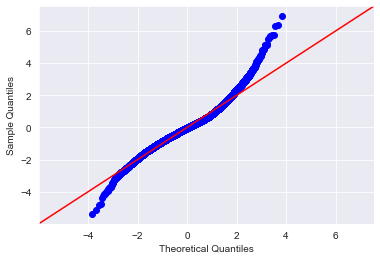

In [117]:
x_p2 = prepped_out.drop('psf', axis=1)
y_p2 = prepped_out['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p2, y_p2, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model2 = model_outlier(X_train, X_test, y_train, y_test)

<AxesSubplot:xlabel='psf'>

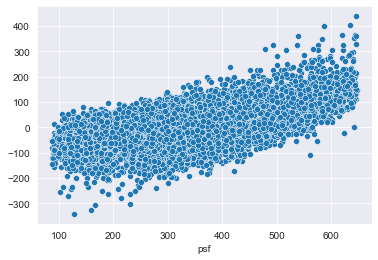

In [118]:
sns.scatterplot(y_p2,prepped_model2.resid)

Train R2:  0.7698906826580837
Test R2:  0.7541973804886724
Train RMSE:  0.0446242952587787
Test RMSE:  0.04549941966248327


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     718.5
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:08:33   Log-Likelihood:                 29179.
No. Observations:               17260   AIC:                        -5.820e+04
Df Residuals:                   17179   BIC:                        -5.757e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0053      0.000    -30.809      0.000      -0.006      -0.005
bedrooms        -0.0132      0.000    -28.290      0.000      -0.014      -0.012
bathrooms       -0.0031      0.001     -4.101      0.000      -0.005      -0.002
floors          -0.0249      0.001    -24.008      0.000      -0.027      -0.023
waterfront       0.1339      0.005     29.679      0.000       0.125       0.143
condition        0.0135      0.001     22.746      0.000       0.012       0.015
grade            0.0082      0.000     18.295      0.000       0.007       0.009
yr_built         0.0001   2.03e-05      5.278      0.000    6.75e-05       0.000
zipcode       2.098e-05   4.08e-07     51.409      0.000    2.02e-05    2.18e-05
livtolot        -0.0274      0.002    -13.358      0.000      -0.031      -0.023
has_basement     0.0511      0.001     58.137      0.000       0.049       0.053
rec_reno         0.0240      0.002     10.584      0.000       0.020       0.028
location        -0.0298      0.002    -13.545      0.000      -0.034      -0.026
zip_98002       -0.0103      0.004     -2.321      0.020      -0.019      -0.002
zip_98003        0.0061      0.004      1.529      0.126      -0.002       0.014
zip_98004        0.2045      0.004     45.928      0.000       0.196       0.213
zip_98005        0.1259      0.005     24.057      0.000       0.116       0.136
zip_98006        0.1200      0.004     29.019      0.000       0.112       0.128
zip_98007        0.1172      0.005     21.838      0.000       0.107       0.128
zip_98008        0.1145      0.005     24.725      0.000       0.105       0.124
zip_98010        0.0515      0.006      8.947      0.000       0.040       0.063
zip_98011        0.0652      0.005     12.979      0.000       0.055       0.075
zip_98014        0.0444      0.006      7.952      0.000       0.033       0.055
zip_98019        0.0363      0.005      7.286      0.000       0.027       0.046
zip_98022        0.0194      0.004      4.598      0.000       0.011       0.028
zip_98023       -0.0064      0.003     -1.844      0.065      -0.013       0.000
zip_98024        0.0643      0.007      9.880      0.000       0.052       0.077
zip_98027        0.0921      0.004     22.995      0.000       0.084       0.100
zip_98028        0.0638      0.005     14.071      0.000       0.055       0.073
zip_98029        0.1068      0.004     23.979      0.000       0.098       0.115
zip_98030        0.0071      0.004      1.726      0.084      -0.001       0.015
zip_98031        0.0193      0.004      4.771      0.000       0.011       0.027
zip_98032       -0.0017      0.005     -0.318      0.751      -0.012       0.009
zip_98033        0.1376      0.004     32.574      0.000       0.129       0.146
zip_98034        0.0890      0.004     21.869      0.000       0.081       0.097
zip_9

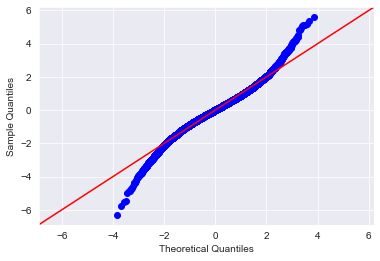

In [119]:
x_p3 = prepped_log.drop('psf', axis=1)
y_p3 = prepped_log['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p3, y_p3, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model3 = model_outlier(X_train, X_test, y_train, y_test)

<AxesSubplot:xlabel='psf'>

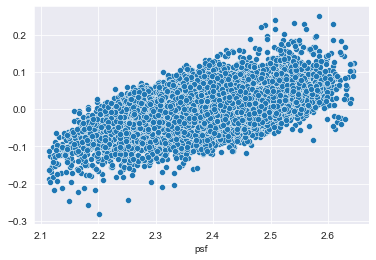

In [120]:
sns.scatterplot(y_p3,prepped_model3.resid)

Train R2:  0.7648626579592024
Test R2:  0.7728028413901962
Train RMSE:  0.04489437072615309
Test RMSE:  0.044556026504909245


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     698.5
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:08:33   Log-Likelihood:                 29073.
No. Observations:               17259   AIC:                        -5.798e+04
Df Residuals:                   17178   BIC:                        -5.736e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0052      0.000    -29.665      0.000      -0.006      -0.005
bedrooms        -0.0134      0.000    -28.555      0.000      -0.014      -0.013
bathrooms       -0.0031      0.001     -3.999      0.000      -0.005      -0.002
floors          -0.0260      0.001    -24.784      0.000      -0.028      -0.024
waterfront       0.1327      0.004     29.976      0.000       0.124       0.141
condition        0.0127      0.001     21.075      0.000       0.011       0.014
grade            0.0079      0.000     17.625      0.000       0.007       0.009
yr_built      8.076e-05   2.06e-05      3.928      0.000    4.05e-05       0.000
zipcode       2.159e-05   4.13e-07     52.324      0.000    2.08e-05    2.24e-05
livtolot        -0.0233      0.002    -11.274      0.000      -0.027      -0.019
has_basement     0.0508      0.001     57.150      0.000       0.049       0.053
rec_reno         0.0235      0.002     10.385      0.000       0.019       0.028
location        -0.0312      0.002    -14.035      0.000      -0.036      -0.027
zip_98002       -0.0075      0.004     -1.686      0.092      -0.016       0.001
zip_98003        0.0080      0.004      1.979      0.048    7.85e-05       0.016
zip_98004        0.2042      0.005     44.942      0.000       0.195       0.213
zip_98005        0.1242      0.005     23.561      0.000       0.114       0.135
zip_98006        0.1190      0.004     28.590      0.000       0.111       0.127
zip_98007        0.1144      0.005     21.215      0.000       0.104       0.125
zip_98008        0.1128      0.005     24.472      0.000       0.104       0.122
zip_98010        0.0558      0.006     10.068      0.000       0.045       0.067
zip_98011        0.0630      0.005     12.658      0.000       0.053       0.073
zip_98014        0.0486      0.006      8.761      0.000       0.038       0.059
zip_98019        0.0379      0.005      7.534      0.000       0.028       0.048
zip_98022        0.0194      0.004      4.495      0.000       0.011       0.028
zip_98023       -0.0076      0.004     -2.152      0.031      -0.015      -0.001
zip_98024        0.0699      0.006     10.762      0.000       0.057       0.083
zip_98027        0.0931      0.004     22.884      0.000       0.085       0.101
zip_98028        0.0624      0.005     13.606      0.000       0.053       0.071
zip_98029        0.1061      0.004     23.587      0.000       0.097       0.115
zip_98030        0.0086      0.004      2.088      0.037       0.001       0.017
zip_98031        0.0177      0.004      4.308      0.000       0.010       0.026
zip_98032        0.0024      0.005      0.453      0.650      -0.008       0.013
zip_98033        0.1369      0.004     32.159      0.000       0.129       0.145
zip_98034        0.0878      0.004     21.285      0.000       0.080       0.096
zip_9

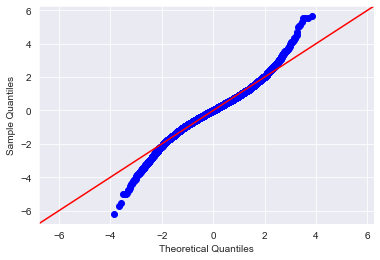

In [121]:
x_p4 = prepped_sqrt.drop('psf', axis=1)
y_p4 = prepped_sqrt['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p4, y_p4, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model4 = model_outlier(X_train, X_test, y_train, y_test)

<AxesSubplot:xlabel='psf'>

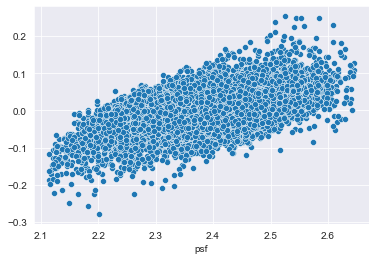

In [122]:
sns.scatterplot(y_p4,prepped_model4.resid)

In [123]:
def model_outlier2(X_train, X_test, y_train, y_test):
    #remove outliers first to avoid data leakage
    train_outliers = remove_outliers(y_train)
    X_train = X_train.drop(train_outliers)
    y_train = y_train.drop(train_outliers)
    
    test_outliers = remove_outliers(y_test)
    X_test = X_test.drop(test_outliers)
    y_test = y_test.drop(test_outliers)
    
    
    
    
    # statsmodels
    features = X_train.copy()
    features['psf'] = y_train
    
    formula = 'psf~' + '+'.join(X_train.columns)
    model = ols(formula=formula, data=features).fit()
    
    #sklearn
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)

    train_mse = mean_squared_error(y_train, y_hat_train)
    test_mse = mean_squared_error(y_test, y_hat_test)

    print("Train R2: ", linreg.score(X_train, y_train))
    print("Test R2: ", linreg.score(X_test, y_test))

    print("Train RMSE: ", train_mse**0.5)
    print("Test RMSE: ", test_mse**0.5)
    
    display(model.summary())
    
    residuals = model.resid
    fig = sm.graphics.qqplot(residuals,dist=stats.norm,line='45',fit=True)
    
    
    return model

Train R2:  0.7673630835041653
Test R2:  0.7623666052625652
Train RMSE:  0.04457014446278879
Test RMSE:  0.0455865355696194


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     708.1
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:08:34   Log-Likelihood:                 29191.
No. Observations:               17255   AIC:                        -5.822e+04
Df Residuals:                   17174   BIC:                        -5.759e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0052      0.000    -30.393      0.000      -0.006      -0.005
bedrooms        -0.0134      0.000    -28.730      0.000      -0.014      -0.012
bathrooms       -0.0030      0.001     -4.017      0.000      -0.005      -0.002
floors          -0.0242      0.001    -23.226      0.000      -0.026      -0.022
waterfront       0.1326      0.004     30.053      0.000       0.124       0.141
condition        0.0130      0.001     21.922      0.000       0.012       0.014
grade            0.0076      0.000     17.036      0.000       0.007       0.008
yr_built         0.0001   2.04e-05      5.033      0.000    6.26e-05       0.000
zipcode       2.116e-05   4.09e-07     51.732      0.000    2.04e-05     2.2e-05
livtolot        -0.0282      0.002    -13.792      0.000      -0.032      -0.024
has_basement     0.0504      0.001     57.272      0.000       0.049       0.052
rec_reno         0.0244      0.002     10.693      0.000       0.020       0.029
location        -0.0312      0.002    -14.430      0.000      -0.035      -0.027
zip_98002       -0.0091      0.004     -2.068      0.039      -0.018      -0.000
zip_98003        0.0042      0.004      1.061      0.289      -0.004       0.012
zip_98004        0.2048      0.004     45.776      0.000       0.196       0.214
zip_98005        0.1250      0.005     24.002      0.000       0.115       0.135
zip_98006        0.1155      0.004     28.016      0.000       0.107       0.124
zip_98007        0.1138      0.005     20.696      0.000       0.103       0.125
zip_98008        0.1110      0.005     24.175      0.000       0.102       0.120
zip_98010        0.0529      0.005      9.645      0.000       0.042       0.064
zip_98011        0.0631      0.005     12.746      0.000       0.053       0.073
zip_98014        0.0465      0.005      8.677      0.000       0.036       0.057
zip_98019        0.0378      0.005      7.565      0.000       0.028       0.048
zip_98022        0.0152      0.004      3.587      0.000       0.007       0.023
zip_98023       -0.0063      0.004     -1.789      0.074      -0.013       0.001
zip_98024        0.0594      0.007      8.894      0.000       0.046       0.072
zip_98027        0.0909      0.004     22.982      0.000       0.083       0.099
zip_98028        0.0588      0.005     12.900      0.000       0.050       0.068
zip_98029        0.1038      0.004     23.326      0.000       0.095       0.112
zip_98030        0.0067      0.004      1.636      0.102      -0.001       0.015
zip_98031        0.0183      0.004      4.579      0.000       0.010       0.026
zip_98032       -0.0028      0.005     -0.525      0.599      -0.013       0.008
zip_98033        0.1375      0.004     33.005      0.000       0.129       0.146
zip_98034        0.0879      0.004     21.780      0.000       0.080       0.096
zip_9

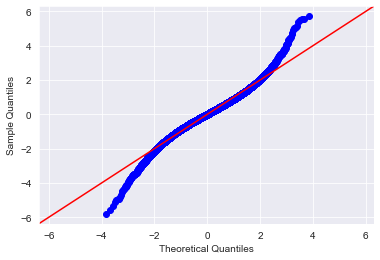

In [124]:
x_p = preprocessed.drop('psf', axis=1)
y_p = preprocessed['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p, y_p, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model = model_outlier2(X_train, X_test, y_train, y_test)

<AxesSubplot:xlabel='psf'>

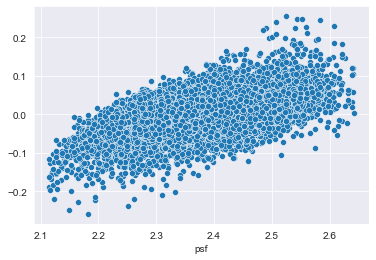

In [125]:
sns.scatterplot(y_p,prepped_model.resid)

Train R2:  0.725700577986728
Test R2:  0.7384404139023244
Train RMSE:  63.57351132139981
Test RMSE:  63.095193967499846


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     548.7
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:08:35   Log-Likelihood:                -92888.
No. Observations:               16673   AIC:                         1.859e+05
Df Residuals:                   16592   BIC:                         1.866e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -6.3334      0.248    -25.529      0.000      -6.820      -5.847
bedrooms       -15.8919      0.677    -23.483      0.000     -17.218     -14.565
bathrooms       -3.8121      1.118     -3.408      0.001      -6.004      -1.620
floors         -33.9578      1.518    -22.369      0.000     -36.933     -30.982
waterfront     198.2977      8.637     22.958      0.000     181.368     215.228
condition       16.1328      0.876     18.414      0.000      14.416      17.850
grade            9.3793      0.657     14.270      0.000       8.091      10.668
yr_built         0.0476      0.030      1.587      0.112      -0.011       0.106
zipcode          0.0010      0.001      1.597      0.110      -0.000       0.002
livtolot       -31.7279      3.015    -10.525      0.000     -37.637     -25.819
has_basement    67.1748      1.276     52.640      0.000      64.673      69.676
rec_reno        27.6907      3.501      7.910      0.000      20.829      34.553
location       -32.6102      3.164    -10.307      0.000     -38.812     -26.409
zip_98002       -8.4297      6.249     -1.349      0.177     -20.677       3.818
zip_98003       -1.9639      5.711     -0.344      0.731     -13.157       9.229
zip_98004      277.8278      6.941     40.029      0.000     264.223     291.432
zip_98005      156.9355      7.399     21.210      0.000     142.432     171.439
zip_98006      138.5214      5.972     23.196      0.000     126.816     150.227
zip_98007      130.7420      7.852     16.650      0.000     115.350     146.134
zip_98008      133.2892      6.540     20.382      0.000     120.471     146.107
zip_98010       52.5265      8.303      6.327      0.000      36.253      68.800
zip_98011       56.8457      7.091      8.017      0.000      42.947      70.744
zip_98014       40.7468      7.944      5.129      0.000      25.176      56.318
zip_98019       32.4257      7.195      4.506      0.000      18.322      46.530
zip_98022       10.0026      6.061      1.650      0.099      -1.877      21.882
zip_98023      -11.6941      4.965     -2.355      0.019     -21.426      -1.963
zip_98024       61.8985      9.345      6.624      0.000      43.581      80.216
zip_98027       91.7080      5.741     15.973      0.000      80.454     102.962
zip_98028       58.0450      6.494      8.939      0.000      45.317      70.773
zip_98029      107.3472      6.375     16.840      0.000      94.852     119.842
zip_98030        5.5174      5.869      0.940      0.347      -5.987      17.021
zip_98031       10.1483      5.762      1.761      0.078      -1.146      21.442
zip_98032       -6.6028      7.419     -0.890      0.374     -21.146       7.940
zip_98033      168.7490      6.092     27.700      0.000     156.808     180.690
zip_98034       89.9195      5.843     15.388      0.000      78.466     101.373
zip_9

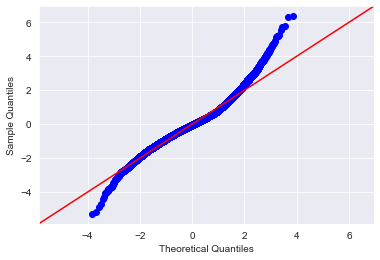

In [126]:
x_p2 = prepped_out.drop('psf', axis=1)
y_p2 = prepped_out['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p2, y_p2, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model2 = model_outlier2(X_train, X_test, y_train, y_test)

Train R2:  0.7667313683125622
Test R2:  0.7655760728250462
Train RMSE:  0.04481542235184204
Test RMSE:  0.044679719238534615


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     705.8
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:08:36   Log-Likelihood:                 29103.
No. Observations:               17259   AIC:                        -5.804e+04
Df Residuals:                   17178   BIC:                        -5.742e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0053      0.000    -30.612      0.000      -0.006      -0.005
bedrooms        -0.0130      0.000    -27.767      0.000      -0.014      -0.012
bathrooms       -0.0041      0.001     -5.373      0.000      -0.006      -0.003
floors          -0.0246      0.001    -23.477      0.000      -0.027      -0.023
waterfront       0.1366      0.005     29.548      0.000       0.128       0.146
condition        0.0128      0.001     21.344      0.000       0.012       0.014
grade            0.0081      0.000     18.023      0.000       0.007       0.009
yr_built         0.0001   2.05e-05      4.937      0.000    6.09e-05       0.000
zipcode       2.116e-05   4.11e-07     51.535      0.000    2.04e-05     2.2e-05
livtolot        -0.0268      0.002    -12.981      0.000      -0.031      -0.023
has_basement     0.0514      0.001     58.221      0.000       0.050       0.053
rec_reno         0.0235      0.002     10.166      0.000       0.019       0.028
location        -0.0312      0.002    -14.139      0.000      -0.036      -0.027
zip_98002       -0.0051      0.004     -1.150      0.250      -0.014       0.004
zip_98003        0.0081      0.004      2.032      0.042       0.000       0.016
zip_98004        0.2046      0.004     45.979      0.000       0.196       0.213
zip_98005        0.1244      0.005     23.624      0.000       0.114       0.135
zip_98006        0.1204      0.004     28.974      0.000       0.112       0.129
zip_98007        0.1134      0.006     20.549      0.000       0.103       0.124
zip_98008        0.1156      0.005     25.464      0.000       0.107       0.125
zip_98010        0.0567      0.006      9.878      0.000       0.045       0.068
zip_98011        0.0640      0.005     12.900      0.000       0.054       0.074
zip_98014        0.0454      0.006      8.130      0.000       0.034       0.056
zip_98019        0.0332      0.005      6.614      0.000       0.023       0.043
zip_98022        0.0151      0.004      3.614      0.000       0.007       0.023
zip_98023       -0.0051      0.003     -1.465      0.143      -0.012       0.002
zip_98024        0.0724      0.007     10.378      0.000       0.059       0.086
zip_98027        0.0910      0.004     22.636      0.000       0.083       0.099
zip_98028        0.0625      0.005     13.767      0.000       0.054       0.071
zip_98029        0.1063      0.004     23.775      0.000       0.098       0.115
zip_98030        0.0086      0.004      2.046      0.041       0.000       0.017
zip_98031        0.0181      0.004      4.480      0.000       0.010       0.026
zip_98032    -2.625e-05      0.005     -0.005      0.996      -0.010       0.010
zip_98033        0.1411      0.004     33.653      0.000       0.133       0.149
zip_98034        0.0900      0.004     22.097      0.000       0.082       0.098
zip_9

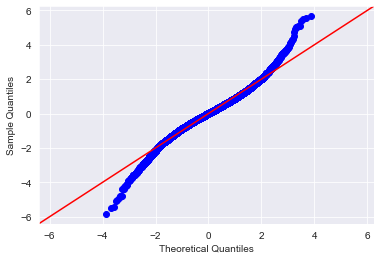

In [127]:
x_p3 = prepped_log.drop('psf', axis=1)
y_p3 = prepped_log['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p3, y_p3, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model3 = model_outlier2(X_train, X_test, y_train, y_test)

<AxesSubplot:xlabel='psf'>

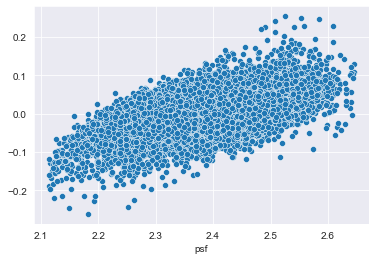

In [128]:
sns.scatterplot(y_p3,prepped_model3.resid)

Train R2:  0.7695728002316083
Test R2:  0.7547964591451144
Train RMSE:  0.044339698559527796
Test RMSE:  0.046562935219560134


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    psf   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     717.1
Date:                Thu, 29 Jul 2021   Prob (F-statistic):               0.00
Time:                        20:08:37   Log-Likelihood:                 29287.
No. Observations:               17259   AIC:                        -5.841e+04
Df Residuals:                   17178   BIC:                        -5.778e+04
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0052      0.000    -30.789      0.000      -0.006      -0.005
bedrooms        -0.0130      0.000    -28.133      0.000      -0.014      -0.012
bathrooms       -0.0035      0.001     -4.654      0.000      -0.005      -0.002
floors          -0.0245      0.001    -23.586      0.000      -0.027      -0.022
waterfront       0.1336      0.004     30.786      0.000       0.125       0.142
condition        0.0125      0.001     21.106      0.000       0.011       0.014
grade            0.0077      0.000     17.306      0.000       0.007       0.009
yr_built       8.45e-05   2.04e-05      4.139      0.000    4.45e-05       0.000
zipcode       2.152e-05    4.1e-07     52.518      0.000    2.07e-05    2.23e-05
livtolot        -0.0270      0.002    -13.269      0.000      -0.031      -0.023
has_basement     0.0514      0.001     58.840      0.000       0.050       0.053
rec_reno         0.0242      0.002     10.552      0.000       0.020       0.029
location        -0.0328      0.002    -14.944      0.000      -0.037      -0.028
zip_98002       -0.0041      0.004     -0.934      0.350      -0.013       0.004
zip_98003        0.0081      0.004      2.030      0.042       0.000       0.016
zip_98004        0.2043      0.004     46.133      0.000       0.196       0.213
zip_98005        0.1268      0.005     25.007      0.000       0.117       0.137
zip_98006        0.1182      0.004     28.858      0.000       0.110       0.126
zip_98007        0.1148      0.005     20.891      0.000       0.104       0.126
zip_98008        0.1120      0.005     24.751      0.000       0.103       0.121
zip_98010        0.0536      0.005      9.801      0.000       0.043       0.064
zip_98011        0.0632      0.005     12.997      0.000       0.054       0.073
zip_98014        0.0446      0.006      8.114      0.000       0.034       0.055
zip_98019        0.0361      0.005      7.323      0.000       0.026       0.046
zip_98022        0.0154      0.004      3.706      0.000       0.007       0.024
zip_98023       -0.0038      0.003     -1.106      0.269      -0.011       0.003
zip_98024        0.0636      0.007      9.615      0.000       0.051       0.077
zip_98027        0.0919      0.004     23.348      0.000       0.084       0.100
zip_98028        0.0607      0.004     13.517      0.000       0.052       0.069
zip_98029        0.1050      0.004     23.959      0.000       0.096       0.114
zip_98030        0.0103      0.004      2.534      0.011       0.002       0.018
zip_98031        0.0201      0.004      4.931      0.000       0.012       0.028
zip_98032        0.0045      0.005      0.862      0.389      -0.006       0.015
zip_98033        0.1380      0.004     32.969      0.000       0.130       0.146
zip_98034        0.0881      0.004     21.868      0.000       0.080       0.096
zip_9

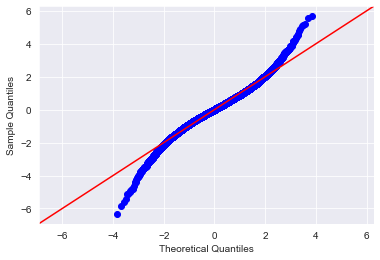

In [129]:
x_p4 = prepped_sqrt.drop('psf', axis=1)
y_p4 = prepped_sqrt['psf']
linreg = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(x_p4, y_p4, test_size=0.2)
linreg.fit(X_train, y_train)
prepped_model4 = model_outlier2(X_train, X_test, y_train, y_test)

<AxesSubplot:xlabel='psf'>

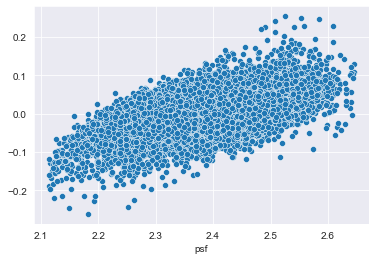

In [130]:
sns.scatterplot(y_p3,prepped_model3.resid)

<AxesSubplot:xlabel='psf'>

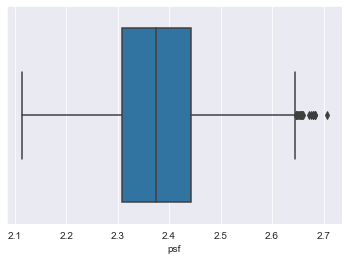

In [131]:
sns.boxplot(y_p4)

In [132]:
prepped_sqrt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 82 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bedrooms      21596 non-null  int64  
 1   bathrooms     21596 non-null  float64
 2   floors        21596 non-null  float64
 3   waterfront    21596 non-null  float64
 4   condition     21596 non-null  int64  
 5   grade         21596 non-null  int64  
 6   yr_built      21596 non-null  int64  
 7   zipcode       21596 non-null  int64  
 8   psf           21596 non-null  float64
 9   livtolot      21596 non-null  float64
 10  has_basement  21596 non-null  int32  
 11  rec_reno      21596 non-null  int32  
 12  location      21596 non-null  int64  
 13  zip_98002     21596 non-null  uint8  
 14  zip_98003     21596 non-null  uint8  
 15  zip_98004     21596 non-null  uint8  
 16  zip_98005     21596 non-null  uint8  
 17  zip_98006     21596 non-null  uint8  
 18  zip_98007     21596 non-nu

In [134]:
prepped_out.describe()

,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,zipcode,psf,livtolot,...,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199
count,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,...,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000,21013.000000
mean,3.371865,2.108635,1.499572,0.003712,3.400276,7.638081,1971.569267,98077.687194,301.962327,0.322919,...,0.013515,0.002713,0.021082,0.012040,0.012802,0.011707,0.012373,0.006472,0.013277,0.013230
std,0.900278,0.758893,0.540744,0.060814,0.643255,1.151452,29.176764,53.417195,125.244902,0.269386,...,0.115470,0.052013,0.143662,0.109068,0.112420,0.107566,0.110548,0.080191,0.114463,0.114261
min,1.000000,0.500000,1.000000,0.000000,1.000000,3.000000,1900.000000,98001.000000,87.588235,0.000610,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.500000,1.000000,0.000000,3.000000,7.000000,1952.000000,98033.000000,204.419643,0.155666,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,2.250000,1.500000,0.000000,3.000000,7.000000,1976.000000,98065.000000,276.153846,0.246316,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,2.500000,2.000000,0.000000,4.000000,8.000000,1997.000000,98118.000000,380.000000,0.405762,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11.000000,8.000000,3.500000,1.000000,5.000000,13.000000,2015.000000,98199.000000,668.604651,4.653846,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [135]:
mod_df.describe()

,bedrooms,bathrooms,floors,waterfront,condition,grade,yr_built,zipcode,psf,livtolot,has_basement,rec_reno,location
count,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000,21596.000000
mean,3.371828,2.115843,1.494119,0.006761,3.409752,7.657946,1971.000787,98077.950685,314.918157,0.323758,0.385071,0.025097,0.307372
std,0.904114,0.768998,0.539685,0.081946,0.650471,1.173218,29.375460,53.514040,147.444085,0.268466,0.486623,0.156424,0.463218
min,1.000000,0.500000,1.000000,0.000000,1.000000,3.000000,1900.000000,98001.000000,87.588235,0.000610,0.000000,0.000000,0.000000
25%,3.000000,1.750000,1.000000,0.000000,3.000000,7.000000,1951.000000,98033.000000,206.488878,0.156649,0.000000,0.000000,0.000000
50%,3.000000,2.250000,1.500000,0.000000,3.000000,7.000000,1975.000000,98065.000000,280.357856,0.247665,0.000000,0.000000,0.000000
75%,4.000000,2.500000,2.000000,0.000000,4.000000,8.000000,1997.000000,98118.000000,391.420966,0.407615,1.000000,0.000000,1.000000
max,11.000000,8.000000,3.500000,1.000000,5.000000,13.000000,2015.000000,98199.000000,1516.746411,4.653846,1.000000,1.000000,2.000000
